Exploring deviations and distributions of the ChrisCo company's website page hits data.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
data.index = pd.to_datetime(data.index)

1. Create a visualisation showing box plots for the 2 high volume pages.

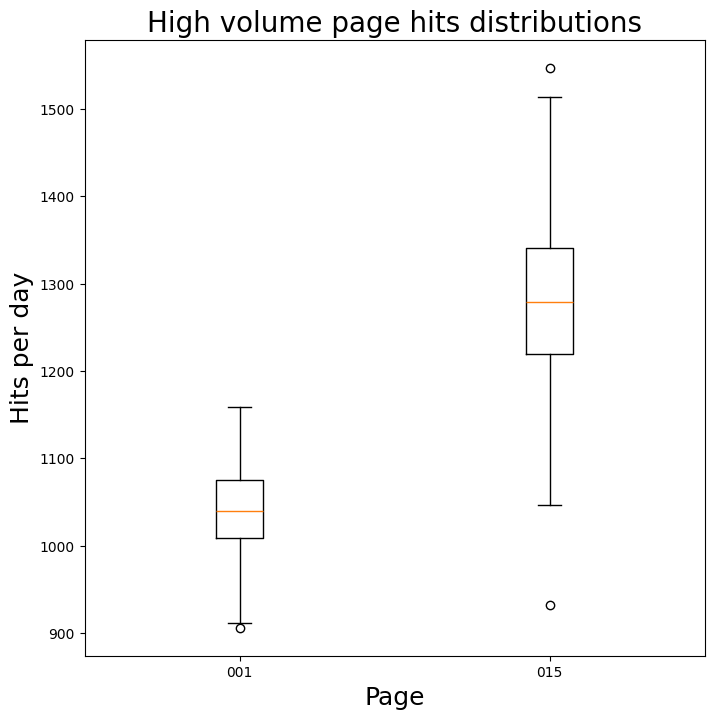

In [ ]:
selected = ['001', '015']

plt.figure(figsize=(8, 8))
plt.boxplot(data[selected], labels=selected)
plt.xlabel('Page', fontsize=18)
plt.ylabel('Hits per day', fontsize=18)
plt.title('High volume page hits distributions', fontsize=20)
plt.show()

Page 001 compared to page 015 is more tightly distributed

2. Using the box plots in item 1 to determine max and min x limits, create a single visualisation showing
histogram subplots of the high volume pages.

15 bins


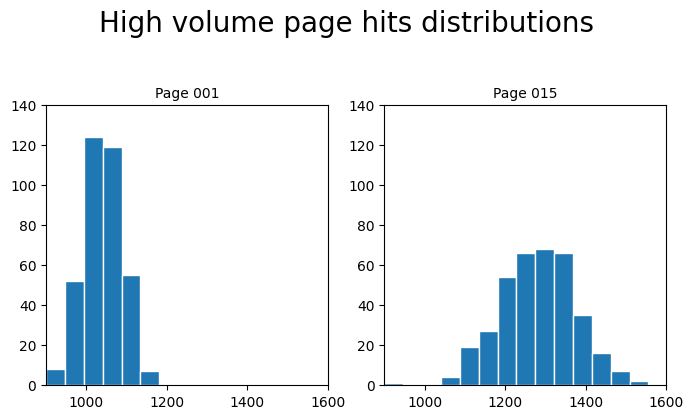

In [ ]:
selected = ['001', '015']

x_min = 900
x_max = 1600
bin_width = 50
# the bin calculations
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) /(n_bins + 1)) for x in range(int(n_bins + 1))]

fig = plt.figure(figsize=(8, 8))
fig.suptitle('High volume page hits distributions', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in selected:
  sub = fig.add_subplot(2, 2, counter)
  sub.set_title('Page ' + name, fontsize=10)
  sub.hist(data[name], bins, edgecolor='w')
  sub.set_xlim(xmin=x_min, xmax=x_max)
  sub.set_ylim(ymin=0, ymax=140)
  counter += 1
plt.show()

High volume pages have approximately normal bell-shaped distributions.

3. Now create a visualisation showing box plots for the 8 medium volume pages.

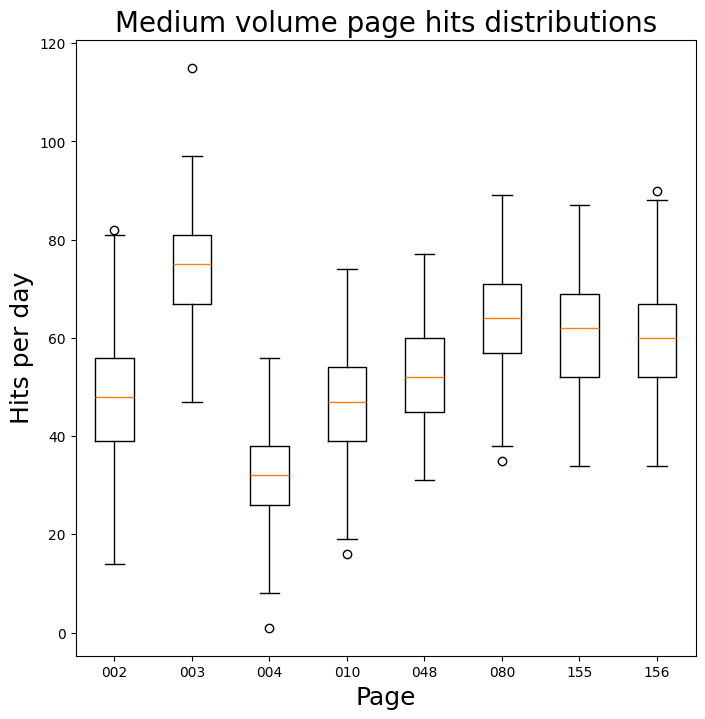

In [ ]:
selected = ['002', '003', '004', '010', '048', '080', '155', '156']

plt.figure(figsize=(8, 8))
plt.boxplot(data[selected], labels=selected)
plt.xlabel('Page', fontsize=18)
plt.ylabel('Hits per day', fontsize=18)
plt.title('Medium volume page hits distributions', fontsize=20)
plt.show()

Page 002 have a more spread distribution, while other pages have almost similar distributions.

4. Again, using the box plots in item 2 to determine max and min x limits, create a single visualisation showing
histogram subplots of the medium volume pages.

11 bins


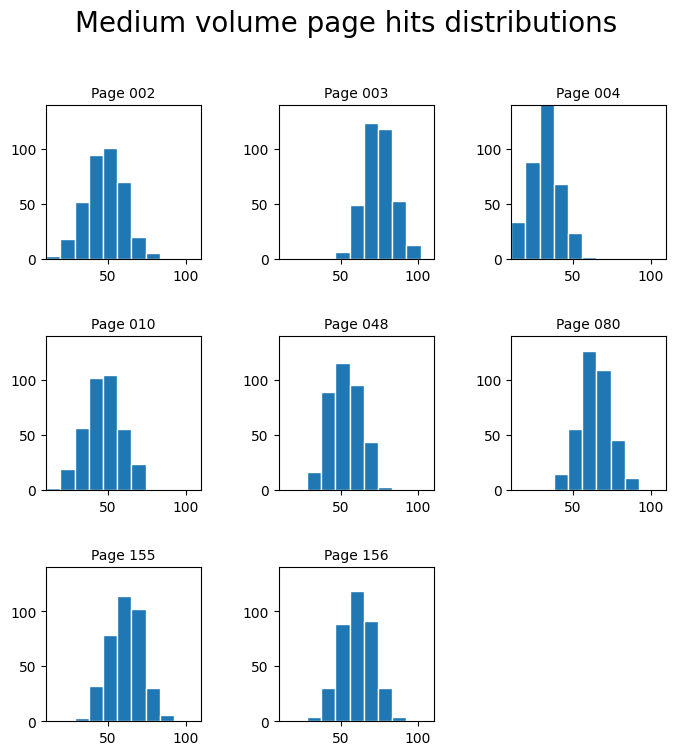

In [ ]:
selected = ['002', '003', '004', '010', '048', '080', '155', '156']

x_min = 10
x_max = 110
bin_width = 10
# the bin calculations
n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) /(n_bins + 1)) for x in range(int(n_bins + 1))]

fig = plt.figure(figsize=(8, 8))
fig.suptitle('Medium volume page hits distributions', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in selected:
  sub = fig.add_subplot(3, 3, counter)
  sub.set_title('Page ' + name, fontsize=10)
  sub.hist(data[name], bins, edgecolor='w')
  sub.set_xlim(xmin=x_min, xmax=x_max)
  sub.set_ylim(ymin=0, ymax=140)
  counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

5. Now, let's create a single visualisation showing line subplots for all high and medium-volume pages.

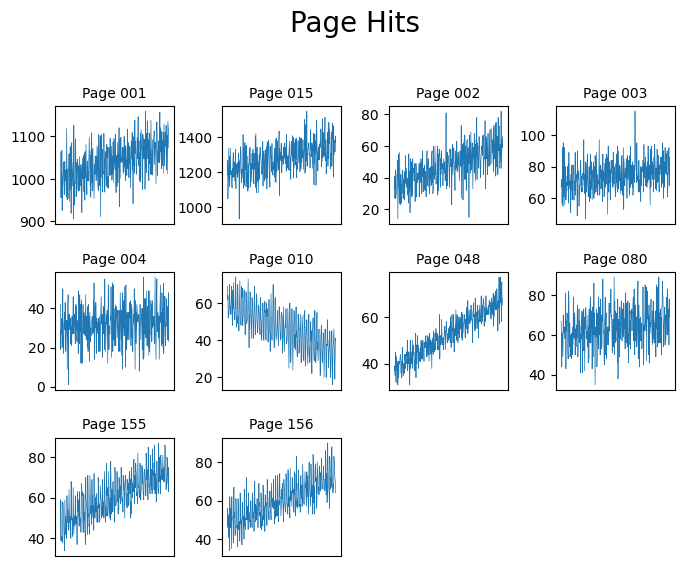

In [ ]:
selected = ['001', '015', '002', '003', '004', '010', '048', '080', '155', '156']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Page Hits', fontsize=20, position=(0.5, 1.0))
for name in data[selected].columns:
  sub = fig.add_subplot(4, 4, counter)
  sub.set_title('Page ' + name, fontsize=10)
  sub.plot(data[selected].index, data[selected][name], linewidth=0.5)
  sub.axes.get_xaxis().set_ticks([]) # remove x ticks
  counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

6. In fact the company strongly suspects that some of the medium volume pages exhibit weekly seasonality.
Let's check this by producing an autocorrelation plot for each medium volume page.

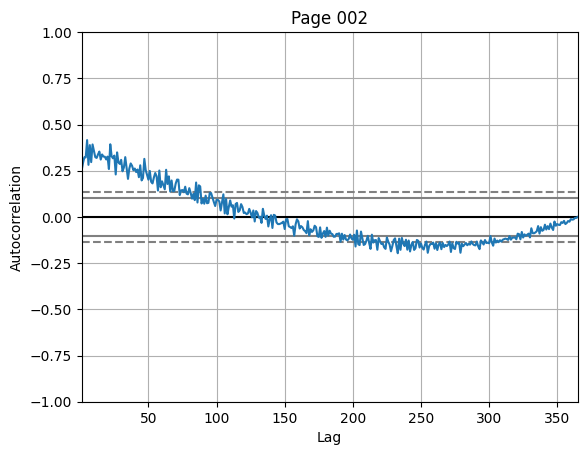

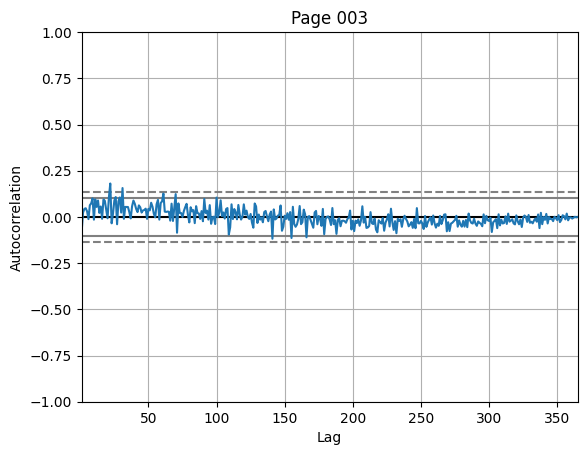

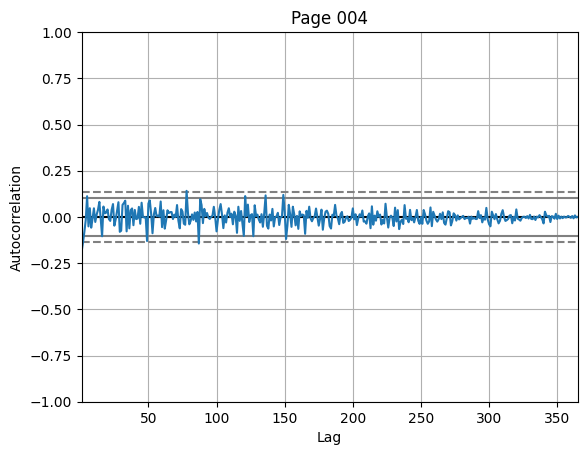

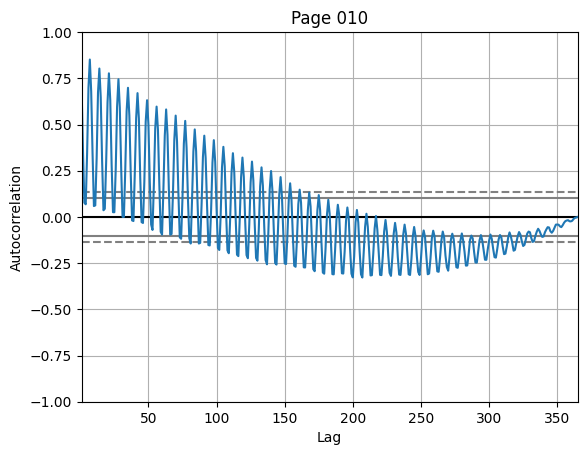

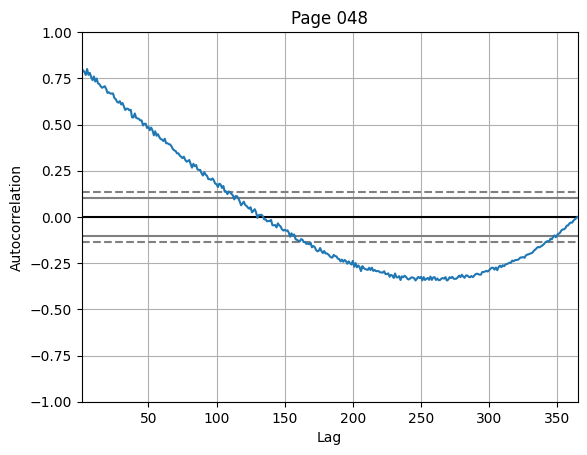

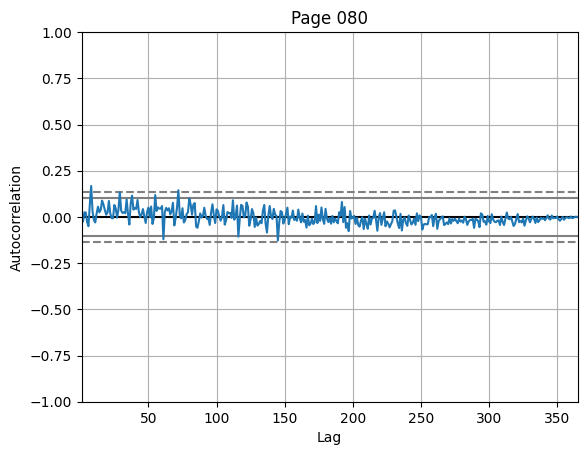

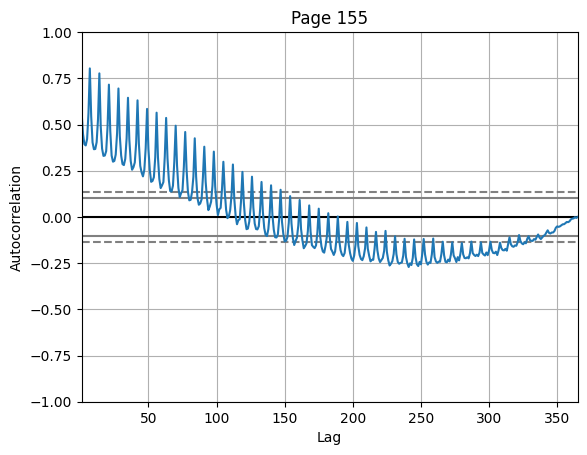

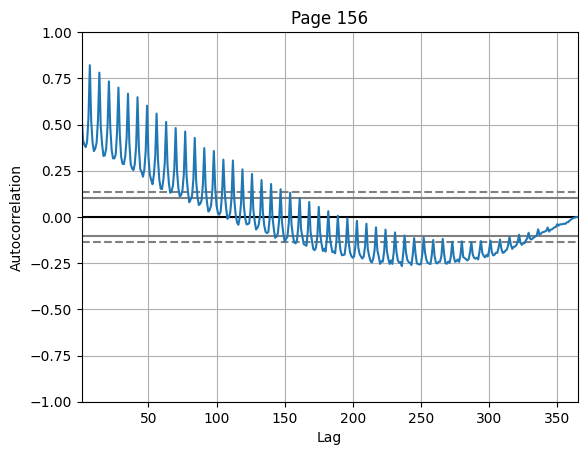

In [ ]:
selected = ['002', '003', '004', '010', '048', '080', '155', '156']

for name in selected:
  pd.plotting.autocorrelation_plot(data[name])
  plt.title('Page ' + name)
  plt.show()

Pages 010, 155, and 156 have weekly seasonality.

7. For those pages which do appear to exhibit weekly
seasonality, limit the x-axis to produce a zoomed in
autocorrelation plot.

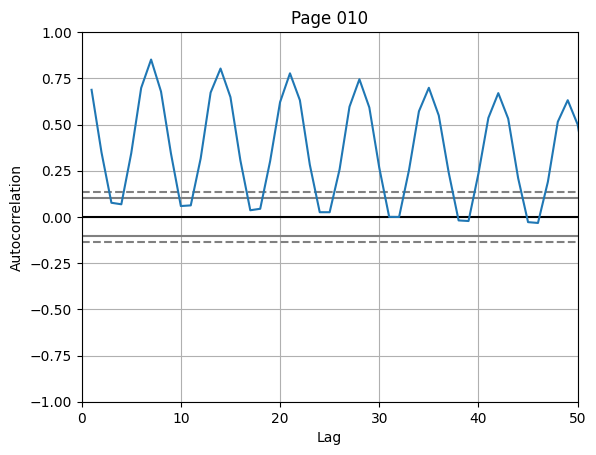

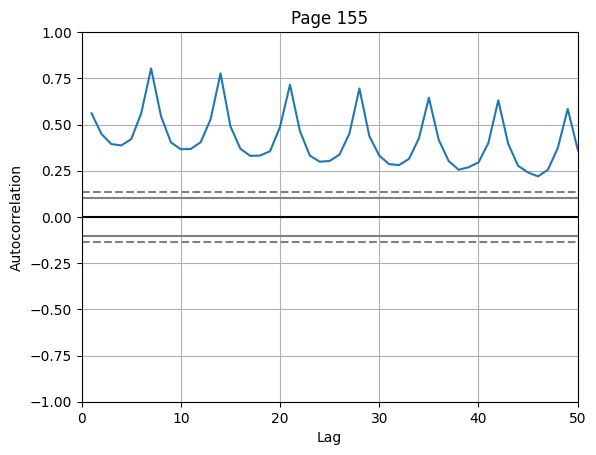

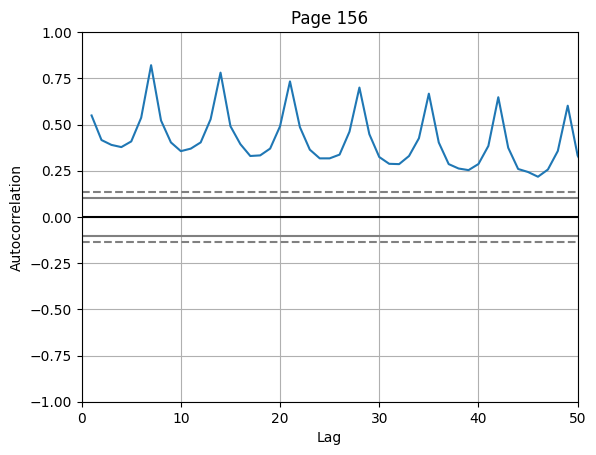

In [ ]:
selected = ['010', '155', '156']

for name in selected:
  pd.plotting.autocorrelation_plot(data[name])
  plt.xlim([0, 50]) # uncomment this line to zoom in
  plt.title('Page ' + name)
  plt.show()

These pages have guite striking peaks at 7 days - weekly seasonality.